## Class project: VARIATION IN MATERNAL AND CHILD CARE IN THE CARRIBEAN REGION

## Introduction 

The Caribbean is a diverse region with a complex history and rich natural environment, however, the region is facing a healthcare crisis- a double burden of chronic and infectious diseases. This syndemic disease burden falls most heavily on the marginalized, and in these countries that is typically women of the urban and rural poor.  A long history of colonialism has created a culture entrenched with patriarchal structures that limit women's access to education and job advancement. Women while being overworked and underpaid are expected to fulfill all the responsibility of caring for the home and all dependents. These structures cause significant stress and wear on the body, often leading to poor health outcomes in Caribbean women, with a large proportion having one or more chronic diseases. A cycle of poverty is thus perpetuated. This issue is even further compounded in pregnant people, which complicates newborns' health. The systemic and cultural issues that lead to varying health outcomes in child-bearing people differ between Caribbean countries and can be attributed to factors like wealth and healthcare policy. 
This project examines the interaction between maternal and child health indicators in 16 Caribbean countries and the degree to which these interactions are influenced by government policy and country income. This will be analyzed on a per-decade basis starting with 1995 then 2005 and 2015. 

Research Question: To what extent do GDP per capita and Policy impact maternal child indicators across Caribbean countries?

Data in the "CaribIndicators" CSV file contains indicators from 1990-2018 there are 3 indicators of maternal child health along with other data on country background: 
   1. Anaemia prevalence in pregnant women (%) = Prev_Anae
   2. Average Maternal Mortality (per 100,000 births) = Avg_MMR
   3. Neonatal mortality (per 1000 births) = Neonat_MR
   4. GDP per capita (in 2017 $USD dollars) = GdpCap
   5. World Bank Development Index = IncomeGroup 
   6. Country Female Population = FemPop
   7. Number of women of childbearing age (thousands)= Wrep_age15_49
   
Data in "Mat_ChildPolicyCaribb" is a set of boolean values which state whether since the 1990s these countries have had certain healthcare policies dedicated to child and maternal care: 
1. Policy on childbirth conditions: Childbirth
2. Policy on a Midwife/another professional being present: Midwife
3. Maternal and Child Postnatal Care: MCHPost
4. Free health care for newborns: NewBrn_Free

Both data sets were retrieved from the UNICEF DATA WAREHOUSE  (https://data.unicef.org/resources/data_explorer/unicef_f/?ag=UNICEF&df=GLOBAL_DATAFLOW&ver=1.0&dq=.CME_TMM0+CME_PND+CME_MRM0..&startPeriod=2016&endPeriod=2022) 

Various global analyses of the data can be found under carious indicator categories on the Unicef website, here is the page with comments done with neonatal mortality: https://data.unicef.org/topic/child-survival/neonatal-mortality/ ks to other analyses 

#### The Map of Main Caribbean Islands 

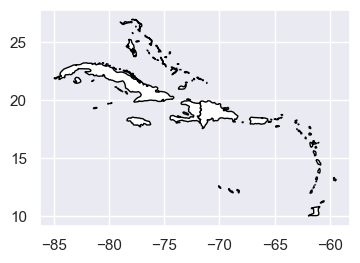

In [15]:
from Ctrends import carib
carib.plot(color= "white", edgecolor= "black", figsize = (4, 5));

##  DATA RANGLING AND MERGING DATA TO ELUCIDATE YEARS FOR COMPARISON

Here I created a data frame called country trends that consist of background on the country context (Female Population, GDP, Woman of Reproductive Age) that has no rows with missing data from 1990-2018. 
In the mch_95/05/15 data frames, I merged data from indicators and the policy datasets for 1995, 2005, and 2015. This is in order to tell changes between each decade, and how GDP and policy might influence the maternal and child health indicators. These tables also contain no rows with missing data.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

In [46]:
#cleaning data for interactive background information
from Dranglez import countrytrends
countrytrends.tail(3)

,Year,Country,FemPop,GdpCap,Wrep_age15_49,IncomeGroup,Avg_MMR
460,2015,Trinidad and Tobago,740581,29053.33,355.087,High income,68.0
461,2016,Trinidad and Tobago,745609,27281.86,353.942,High income,68.0
462,2017,Trinidad and Tobago,750569,26342.62,353.315,High income,67.0


In [4]:
#getting Data for the 3 main years 
from Drangle import mch_95,mch_05,mch_15

## Visualize the data: Caribbean Context and Trends in Indicators

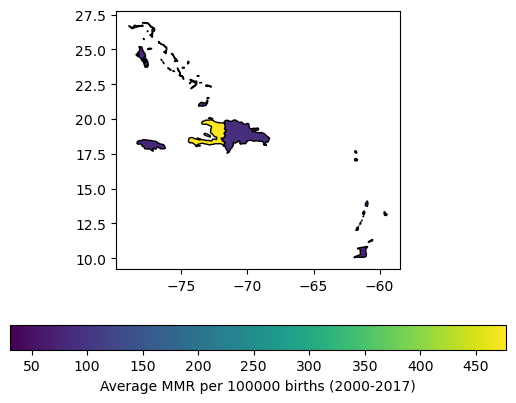

In [5]:
#Maps Showing Caribbean Island and Cholorpleth Map Showing MMR in the Caribbean region
from Ctrends import economic
economic.plot(column = 'AvgMMR', legend = True, edgecolor= "black",
                   legend_kwds={'label': "Average MMR per 100000 births (2000-2017)", 
                                'orientation': "horizontal"});

This is a choropleth map that shows the average MMR for major Caribbean Islands in the country trends data set. Mainland Caribbean countries were not included and Cuba was not included in the plot due to missing data. Most Caribbean countries have an MMR below the global averge of 158 deaths per 100000 births.

In [17]:
#Tracking Changes in  Maternal Mortality in the Region 
from Ctrends import Women_Gdp
Women_Gdp.show(figsize = (4, 3))

This interactive plot shows the annual Average Maternal Mortality (/ 100 thousand births) and how it has changed with GDP per capita between 200-2017. The sizes of the points correspond to the proportion of the population that is female. Although the majority of countries have seen an increasing GDP, the MMR has remained fairly constant. In fact, most countries are way above the global target of 70 maternal deaths/ 100000 births.

### Maternal Indicators -1995

In [7]:
mch_95.head(2)

,Year,Country,FemPop,IncomeGroup,GdpCap,Wrep_age15_49,Neonat_MR,Childbirth,Midwife,MCHPost,NewBrn_Free
0,1995,Antigua and Barbuda,35805,High income,15628.32,19.512,9.68383,True,False,True,True
1,1995,Bahamas,152618,High income,34716.54,76.858,9.70188,False,False,False,True


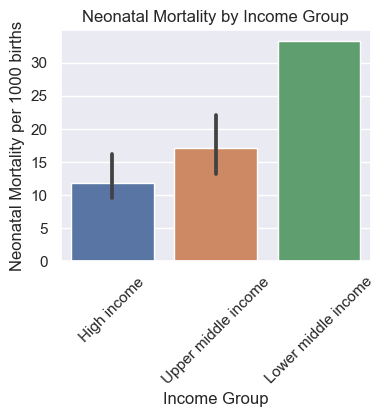

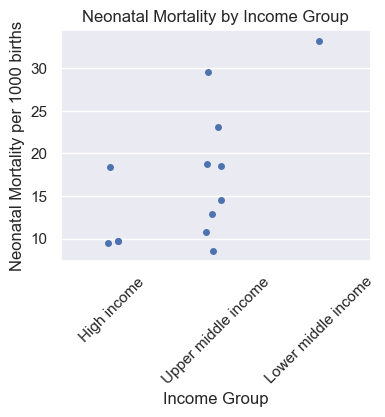

In [29]:
#Investigating Economic impact on Neonatal Mortality
from MCh_policy import plot_neonatal_mortality
#Comparing NMR between IncomeGroup
plot_neonatal_mortality(mch_95, 'IncomeGroup')

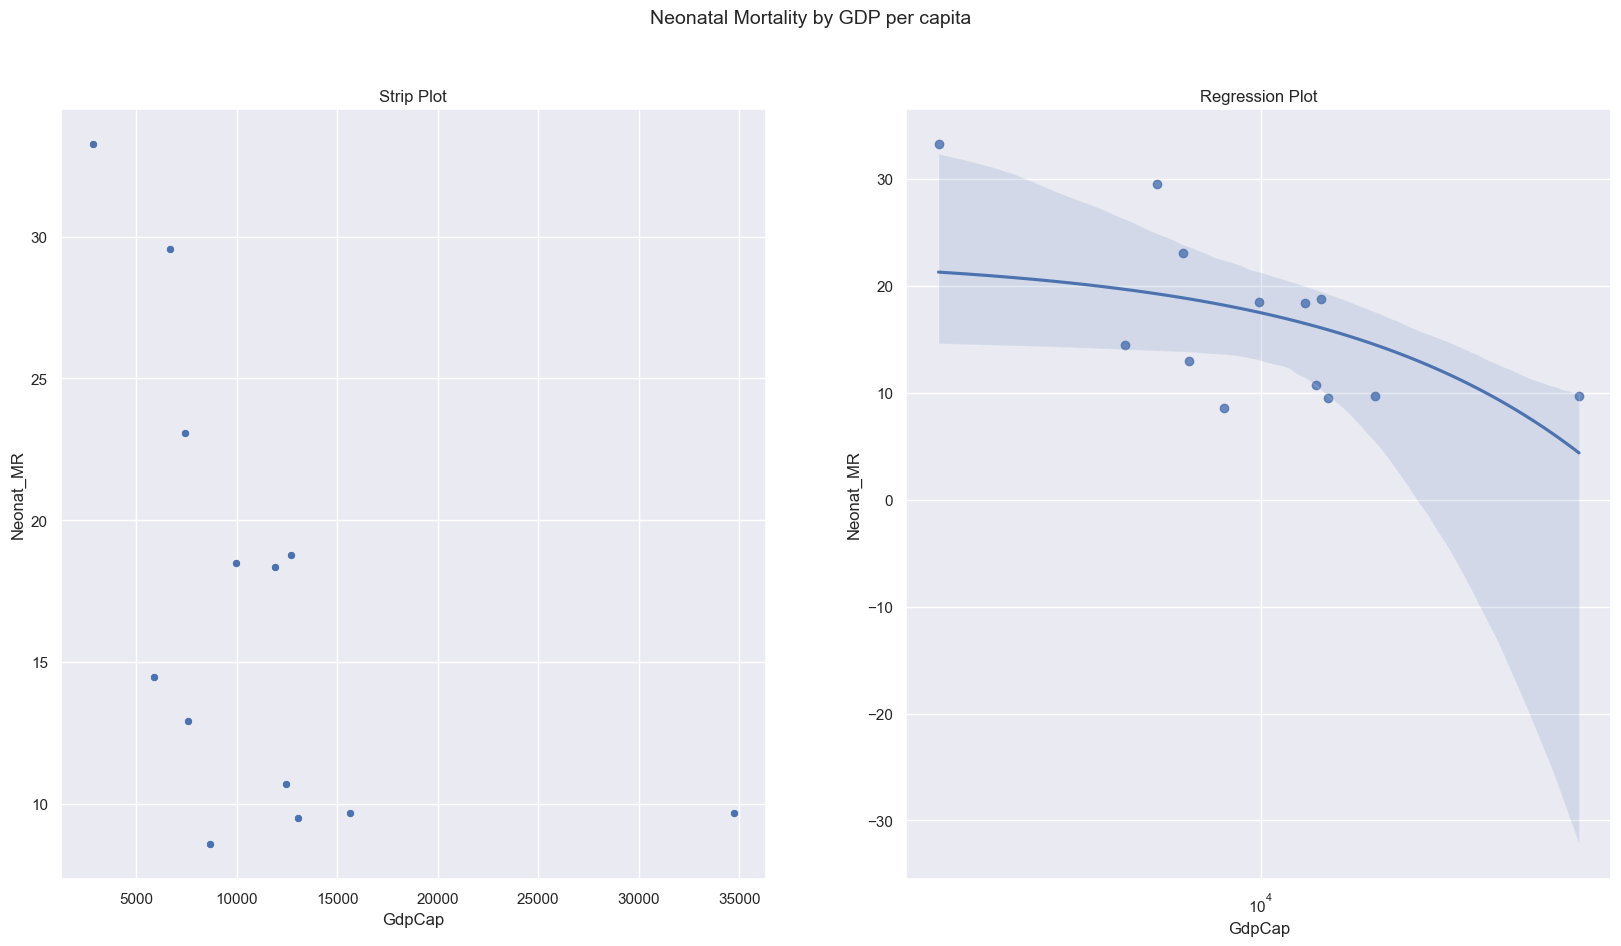

In [31]:
# Comparing for GDP
plot_neonatal_mortality(mch_95, 'GdpCap')

The Only Data available for 1995 was the Neonatal mortality rate. The visualizations aim to show the correlation between deaths among newborns and Income. The strip plot clearly groups most countries as Upper Middle Income, and in that category there seem to be more complex interactions. This is more clearly seen in the scatterplot where a slight trend among Upper Middle-Income countries suggests that richer countries have lower neonatal deaths. The regression plot suggest that this, while the bar plot shows the lower middle income countries average Neonatal Mortality is much higher. 

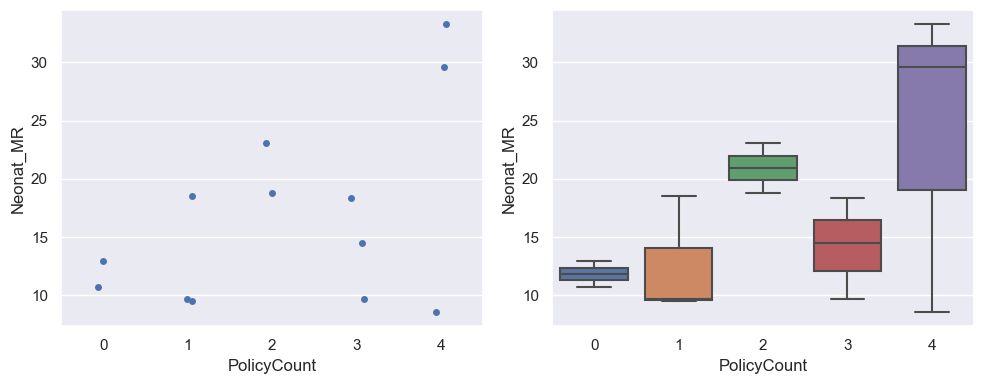

Text(0.5, 0.98, 'Differences amongst Neonatal mortality in different health policy contexts')

<Figure size 640x480 with 0 Axes>

In [36]:
#Investigating Impact of Maternal and Child Policy on Neonatal Mortality 
from MCh_policy import add_bool_pol_column,Neo95,plot_strip_box_subplots
plot_strip_box_subplots(Neo95,["Neonat_MR"])
plt.suptitle('Differences amongst Neonatal mortality in different health policy contexts')

These plots above and below are to examine the link between healthcare policy and neonatal death rates, as well as the connection between GDP and Policy aimed at care. It seems having more than one policy does not significantly alter neonatal health outcomes. Policies although present might not have been allocated a significant budget in 1995. It seems that countries with the post polices are amongst the lower income groups, and countries in that category has the highest median neonatal mortality

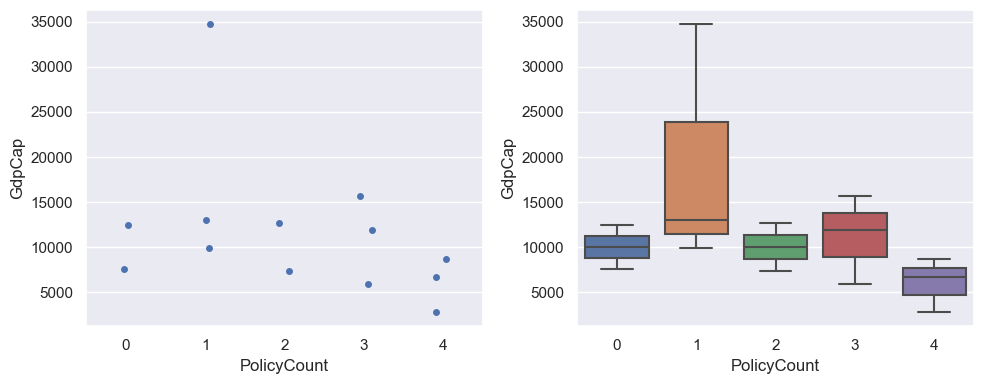

Text(0.5, 0.98, 'Relationship between Policy COunt and Gdp per Capita')

<Figure size 640x480 with 0 Axes>

In [38]:
plot_strip_box_subplots(Neo95,["GdpCap"])
plt.suptitle('Relationship between Policy COunt and Gdp per Capita')

### Maternal Indicators-2005


Text(0.5, 0.98, 'Relationship between Log GDP per Capita and Health Indicators')

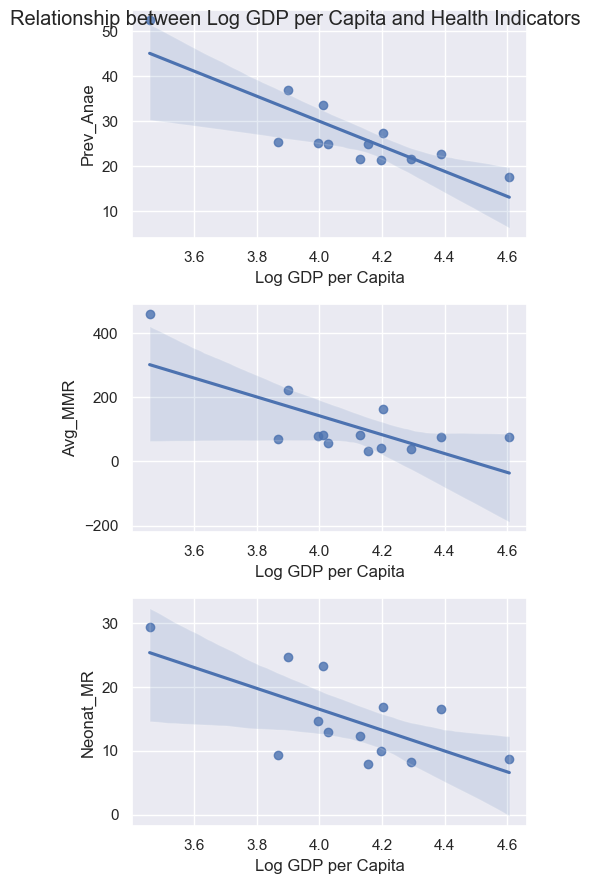

In [40]:
#Investigating influence of economy (GDP/capita) on 3 MCH indicators
from MCh_policy import gdp_subplots,extract_6_cols,plot_pairplot,Mch_05ind
gdp_subplots(mch_05,['Prev_Anae','Avg_MMR',"Neonat_MR"],plot_type="reg")
# Set the title of the plot
plt.suptitle('Relationship between Log GDP per Capita and Health Indicators')


The above subplots try to find the 2005 correlation between Maternal and Neonatal mortality, as well as the prevalence of anaemia in pregnant women (%) and GDP  per capita. Compared to the 1995 visualization that does not use a log scale, the negative regression is more clear indicating that a higher GDP per capita might be associated with better maternal and childcare health outcomes. However these trends are dominated by the lowest and highest values seeing that there seems to be economic and health care continuity between countries, most data is clustered amongst the middle income countries , and it is hard to make a concrete determination especially for the Neonatal Mortality subplot

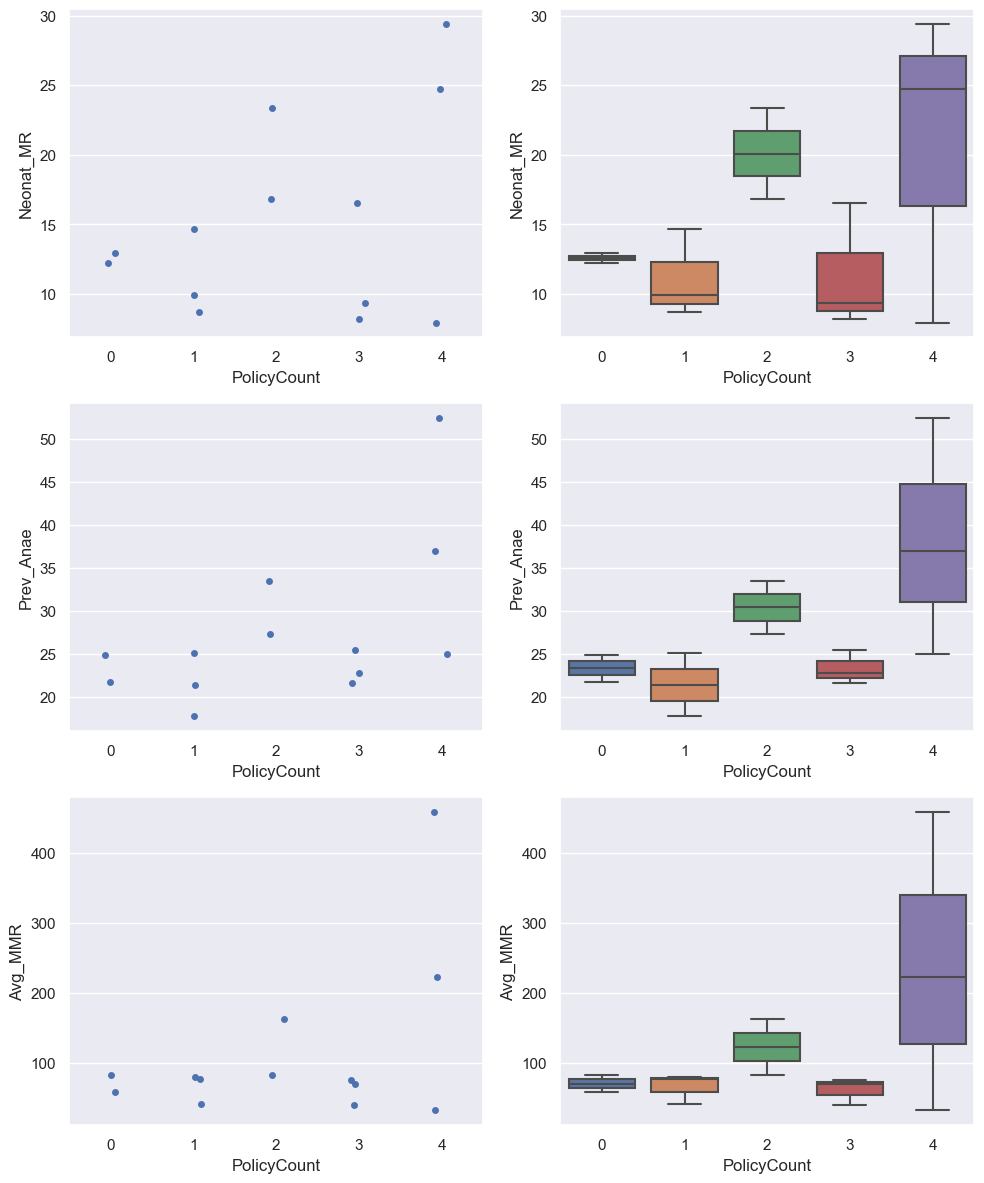

In [41]:
#Influnce of Policy on MCH indicators
plot_strip_box_subplots(Mch_05ind,["Neonat_MR",'Prev_Anae', 'Avg_MMR'])

#The plots below again show no clear influence of the amount of healthcare policies on health outcome

Countries with two policies seem to outperfom all other countries in the health indicators, this is consistent with the trend seen in 1995

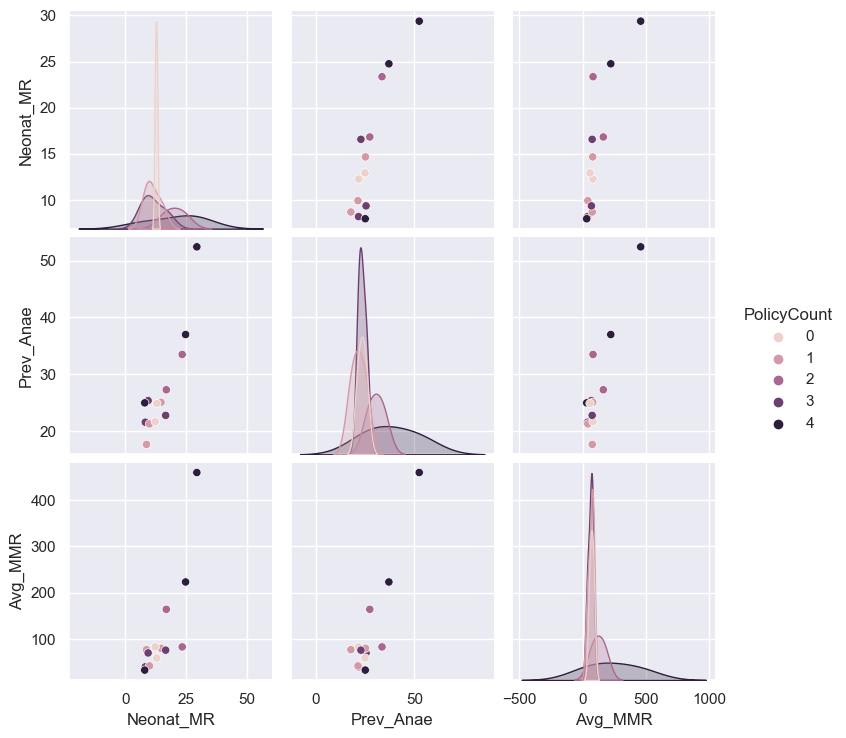

In [42]:
#Creating function to analyse various variables in a pairplot
plot_pairplot(mch_05, ["Neonat_MR",'Prev_Anae', 'Avg_MMR'], hue='PolicyCount')
# The plots below relate healthcare indicators with one another and track policy count associations

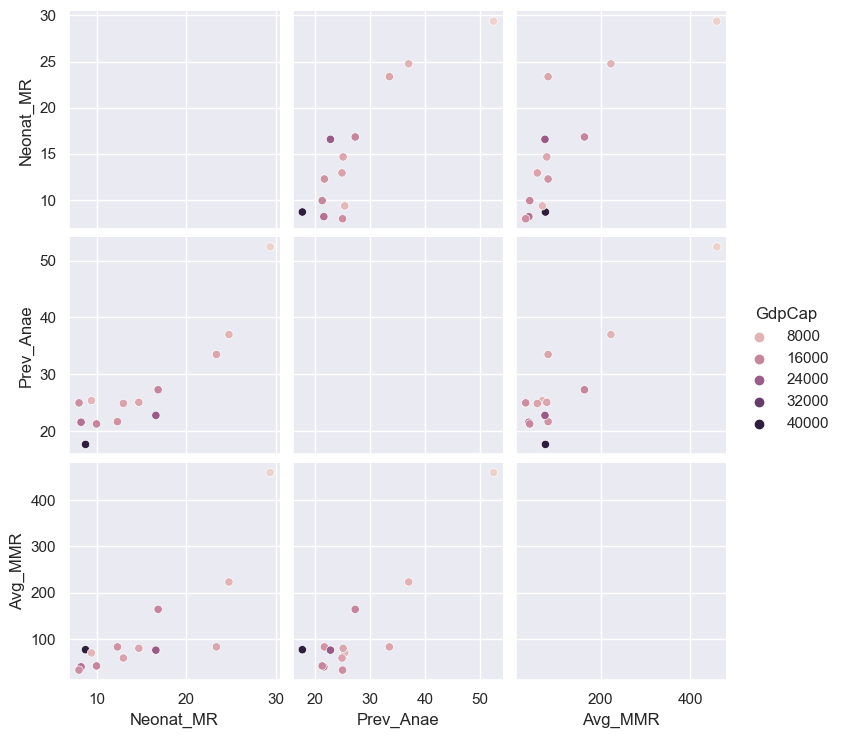

In [43]:
plot_pairplot(mch_05, ["Neonat_MR",'Prev_Anae', 'Avg_MMR'], hue='GdpCap')
# The plots below relate healthcare indicators with one another and track Gdp/capita associations

From the above plots it seems that GdpCap compared to the number of Maternal and Childcare policies a country had more significant relationship in health indicator outcomes. Also maternal indicators of morbidity and mortality (Anaemia prevalence and Maternal mortality rate) also have a significant correlation to neonatal mortality i.e. the early life of the child is impacted by the health of the mother.

### Maternal Indicators-2015

All the plots done for 2005 were completed for 2015. See MCh_policy jupyter notebook for code in Github repository.

## Analyses: Assessing and Comparing Changes in Maternal Indicators between the decades

Pandas analyses on descriptive statistics were carried out on the datasets for 1995, 2005 and 2015 and most can be found in the code in the Github repository in the Drangle Jupyter notebook. Once we have completed our statistics and machine learning module I will try to incorperate more in this section.

For eg. below is a summary stat table for the 2015 data 

In [14]:
from Drangle import indi_15
summary15=indi_15.describe()
summary15

,Year,FemPop,GdpCap,Wrep_age15_49,Prev_Anae,Avg_MMR,Neonat_MR
count,13.0,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2015.0,1.082402e+06,15851.423846,570.184231,24.361538,109.000000,13.281262
std,0.0,1.883032e+06,8738.850481,995.839321,8.789154,121.031676,6.613892
min,2015.0,4.711300e+04,3102.340000,26.132000,16.000000,25.000000,4.249840
25%,2015.0,8.823900e+04,11261.780000,50.925000,19.200000,43.000000,10.065210
50%,2015.0,2.038580e+05,15142.060000,103.962000,21.600000,74.000000,11.018600
75%,2015.0,7.405810e+05,18594.540000,355.087000,23.900000,115.000000,12.681690
max,2015.0,5.317598e+06,36023.590000,2828.054000,49.300000,488.000000,27.069100


### Testing Impact of GDP on neonatal mortality and maternal anaemia 

In [49]:
import scipy.stats as stats
from Dranglez import Gdp_neo, Prev_Fe
# Perform correlation test on Neonatal Mortality and Anaemia Prevalence 
corr, pval = stats.pearsonr(Gdp_neo ['avg_NrMR'], Prev_Fe['avg_anemia'])

# Print results
print('Pearson correlation coefficient:', corr)
print('p-value:', pval)

Pearson correlation coefficient: 0.9077186341464559
p-value: 1.809198565872103e-05


There is a significant relationship between neonatal mortality and maternal anaemia, poor health outcomes in newborns are thus correlated to the prenatal nutrition of mothers. Other analysis were done, and maternal aneamia was also related to GDP per Capita, however GDP per capita had no significant relationship with neonatal outcomes. 

In [50]:
from Dranglez import accuracy_scores
accuracy_scores

[0.3333333333333333,
 0.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

I did machine learning to predict country Income Group based on GDP, and changes in neonatal mortality from 1995-2015. Using Knn suggest only 66% prediction accuracy.

## Conclusions

A finding from the data suggests that Country Income and GDP per capita correlate with maternal and child health outcomes. Another finding is that the total number of policies does not have any significant relationship with health outcomes. I had expected that number of policies might be associated with the overall strength of the healthcare system but this does not seem to be the case, as the countries with two or more policies seemed to have poorer health outcomes compared to those with 0 or none. Moreover, the number of policies showed little connection to the country's wealth as well, expect in countries that were low income, low income countries had the greatest number of policies.

One major finding is that neonatal outcomes are most influenced my the prenatal health of the mothers and this was confirmed in the hypothesis test.

When comparing the years 1995, 2005, and 2015 it was seen that there was an increase in the average GDP per capita across these years and corresponding decreases in maternal and neonatal mortality as well as anemia prevalence in pregnant women. These differences have standard deviations of between 0.6 to 0.8. However, these trends are only seen when comparing between years and are less clear within years. This is possible due to the small data set of less than 20 countries and as the region is mostly homogenous in cultural, social, and demographic makeup the data points more or less overlap making it harder to notice profound differences. 

It is worth exploring this data amongst the wider Latin America and Caribbean region, and with more indicators detailing maternal and child health outcomes. Mortality as a proxy for health is poor, and it would be more insightful to see what mother and child are dying from. If these diseases are most treatable and preventable it might give further insight into the connection between healthcare access, poverty, and subsequent health outcomes. 
Secondly instead of focusing on the number of healthcare policies present the data could instead be health expenditure for maternal and child health services. This will see if the policies present are actually being implemented and having an impact on the people they are supposed to help.

## Reflection
  
I had a hard time making my data set work for me, and I wish I had the opportunity to get data on government expenditure that is more accessible. I think this would have helped me refine and have a more nuanced analysis of my research question. However, the hardest part of the project was manipulating the data and deciding what visualization would serve the analysis best. It took a lot of cleaning the data, ensuring no spaces in between words, and ensuring the correct types. 

I had a fun time playing around with the modules and creating functions to use in my project file. I got a lot of practice using functions to manipulate data frames and to create subplots that I would be using multiple times. It was also fun getting geometry data online and using it to create a map of the Caribbean and plotting a choropleth map from it. 

But overall I enjoyed working on this project and learning about visualizations like pairplot, and I feel like I learned a lot. I am sad that I was not able to conduct more of the Hypothesis testing on other indicators and using other classifiers for machine learning. I also wish I did analysis on Income groups separately to see what factors beyond Income are influencing these health outcomes 

I spent a total of twenty hours on this draft, most time was spent finding and cleaning data as well as coming up with a research idea. 


## Appendix (optional)

You can find my modules under their corresponding juptyer notebooks in my Github repository
Link: https://github.com/ininzliz/Mch_Indicators-Carib/tree/main/finalproject
truefinalproject is the main folder 
